# Examples

This page shows some of the ways to use betterplotlib. 

This page is currently under construction, so stop by later for more!

I'll start by doing some of the imports we always use.

In [1]:
%matplotlib inline
import betterplotlib as bpl
import matplotlib.pyplot as plt
import numpy as np

bpl.default_style()

## Histogram

First, let's do a comparison of how betterplotlib's histogram is actually better. We'll make the same plot with the default `hist()` and with `bpl.hist()`. The only parameter we will use is `alpha` so we can plot two distributions at once and still see them both.

In [2]:
x1 = np.random.normal(-1, 2, 5000)
x2 = np.random.normal(1, 2, 5000)

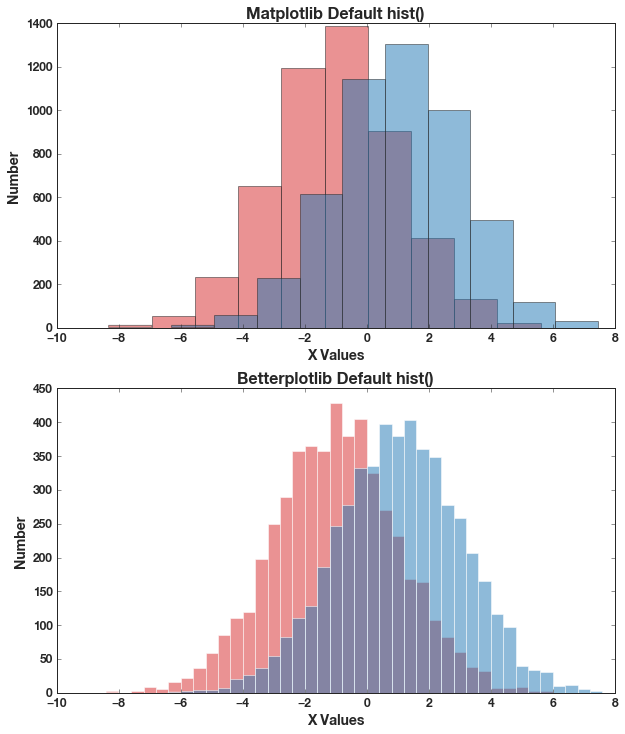

In [3]:
fig, [ax1, ax2] = plt.subplots(figsize=[10, 12], nrows=2)

# matplotlib plot
ax1.hist(x1, alpha=0.5)
ax1.hist(x2, alpha=0.5)
ax1.set_xlabel("X Values")
ax1.set_ylabel("Number")
ax1.set_title("Matplotlib Default hist()")

# betterplotlib plot
bpl.hist(x1, alpha=0.5, ax=ax2)
bpl.hist(x2, alpha=0.5, ax=ax2)
bpl.add_labels("X Values", "Number", "Betterplotlib Default hist()")

Some things to note: The bin size is chosen much better in the betterplotlib plot. The bins line up with each other, too. This doesn't always happen in betterplotlib without user intervention, but sometimes does. The white outline on the bars looks nicer than the black. Also note that the color cycle is changed, as well as the font. This is the same for both plots, since it was done by the `bpl.default_style()` function above. The matplotlib plot would look even worse without it. Also note how much less work it is to set the axes labels with betterplotlib.

There are some extra parameters that can be passed in to `bpl.hist()` that `plt.hist()` doesn't have, too. I also make a dark axis, which makes some plots look nicer.

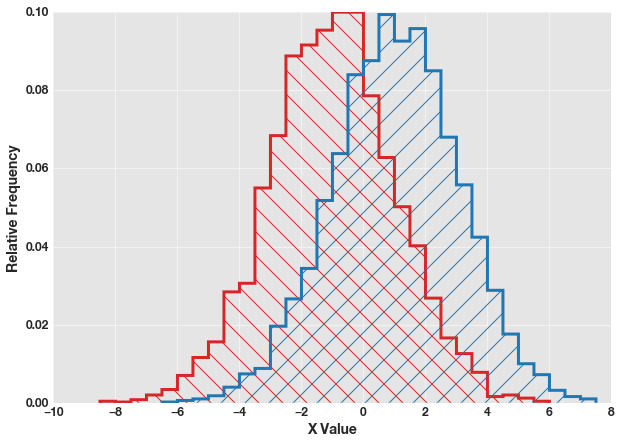

In [4]:
bpl.hist(x1, rel_freq=True, histtype="step", bin_size=0.5, lw=3, hatch="\\")
bpl.hist(x2, rel_freq=True, histtype="step", bin_size=0.5, lw=3, hatch= "/")

bpl.make_ax_dark()
bpl.add_labels("X Value", "Relative Frequency")

Note that when we pass in `bin_size`, the bins will always line up.

## Scatter

The default scatter plot in matplotlib is truly bad. Here's an example.

In [5]:
x1 = np.random.normal(0, 1, 1000)
y1 = np.random.normal(0, 1, 1000)

x2 = np.random.normal(2, 1, 1000)
y2 = np.random.normal(2, 1, 1000)

x3 = np.random.normal(0, 1, 1000)
y3 = np.random.normal(2, 1, 1000)

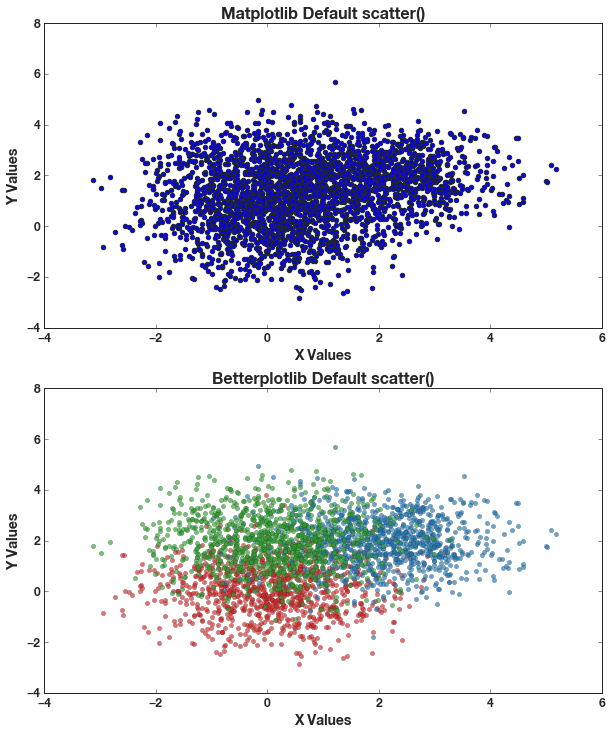

In [6]:
fig, [ax1, ax2] = plt.subplots(figsize=[10, 12], nrows=2)

# matplotlib plot
ax1.scatter(x1, y1)
ax1.scatter(x2, y2)
ax1.scatter(x3, y3)
ax1.set_xlabel("X Values")
ax1.set_ylabel("Y Values")
ax1.set_title("Matplotlib Default scatter()")

# betterplotlib plot
bpl.scatter(x1, y1, ax=ax2)
bpl.scatter(x2, y2, ax=ax2)
bpl.scatter(x3, y3, ax=ax2)
bpl.add_labels("X Values", "Y Values", "Betterplotlib Default scatter()")

Note how matplotlib's scatter doesn't use the color cycle, has thick borders around its points, and doesn't use transparency. In contrast, `bpl.scatter()` does use the color cycle, has thin marker edges, and picks an alpha value smartly based on the number of points in the plot. 

There are also some of betterplotlib's other functions that are useful here.

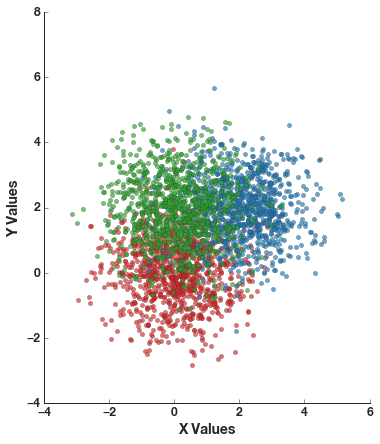

In [7]:
bpl.scatter(x1, y1)
bpl.scatter(x2, y2)
bpl.scatter(x3, y3)
bpl.add_labels("X Values", "Y Values")
bpl.equal_scale()
bpl.remove_spines(["top", "right"])

## Contour